In [395]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from typing import List
from typing import Tuple

pd.options.display.max_columns = None 

In [396]:
def read_file(file_path):
    return pd.read_csv(file_path)

def line_regression_graph(X_test: int, y_test: int, y_pred: int):
    print('Linear Regression Model Scatter Plot:')
    plt.scatter(X_test, y_test, color = 'r')
    plt.plot(X_test, y_pred, color='b')


def line_regression(X: int, y: int):
    sc = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)
    sc.fit_transform(X_train)
    sc.fit_transform(X_test)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    accuracy_score = regression_model.score(X_test, y_test)
    print(accuracy_score)
    print('\n')
    y_pred = regression_model.predict(X_test)
    r2_score(y_test, y_pred)
    print('Predicted Y values:')
    # print(y_pred)
    print('\n')
    plot_linear_regression_graph(X_test, y_test, y_pred)
    return X_train, X_test, y_train, y_test

def logic_regression(X: int, y: int):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    sc.fit_transform(X_train)
    sc.fit_transform(X_test)
    regression_model = LogisticRegression()
    regression_model.fit(X_train, y_train)
    accuracy_score = regression_model.score(X_test, y_test)
    print('Accuracy Score for Logistic Regression Model:')
    print(accuracy_score)
    print('\n')
    y_pred = regression_model.predict(X_test)
    r2_score(y_test, y_pred)
    print('Predicte Y values:')
    print(y_pred)
    print('\n')
    regression = LogisticRegression(random_state=42).fit(X_train, y_train)
    y_predicted = regression.predict(X_test)
    y_predicted
    regression.score(X_test, y_test)

def knn_classifier(X_train: int, X_test: int, y_train: int, y_test: int):
    sc = StandardScaler()
    n_nbhs = 13
    X_train = sc.fit_transform(X_train) 
    X_test = sc.fit_transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = n_nbhs) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    here = knn.score(X_test, y_test)
    print(here)
    print(y_pred)
    print(type(y_pred)) 

In [397]:
credit_df = read_file('Credit_card.csv')
credit_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [398]:
#1
credit_df_encoded = pd.get_dummies(df, dtype = int)
credit_df_encoded.head()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Occupation_Accountants,Type_Occupation_Cleaning staff,Type_Occupation_Cooking staff,Type_Occupation_Core staff,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5009749,0,NaN,-13557.0,-586,1,1,1,0,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [399]:
from  sklearn.model_selection import train_test_split
credit_df_encoded.corr()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Occupation_Accountants,Type_Occupation_Cleaning staff,Type_Occupation_Cooking staff,Type_Occupation_Core staff,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
Ind_ID,1.000000,0.032535,0.030147,0.022909,-0.055396,NaN,0.085794,0.008403,-0.037923,0.016950,-0.024617,0.027597,0.046811,-0.046811,0.050421,-0.050421,0.005926,-0.060256,0.015238,0.032624,-0.034104,-0.026715,0.029541,0.005147,0.013797,0.023198,-0.032530,0.007515,0.013948,0.012707,0.043241,-0.060418,0.065992,0.015547,0.005193,0.011548,-0.021016,0.014727,-0.003634,0.003680,-0.006072,0.008356,0.026125,-0.022648,-0.001947,-0.001929,0.006502,0.044050,0.066078,0.018468,0.006714,0.023849,0.064955,0.035227
CHILDREN,0.032535,1.000000,0.078497,0.279716,-0.219095,NaN,0.035014,-0.004908,0.025776,0.890248,-0.061377,0.063068,-0.063467,0.063467,0.003352,-0.003352,0.059449,-0.217467,0.035128,0.095880,0.027202,0.052443,0.036255,-0.012001,-0.064543,-0.002331,0.145940,0.001284,-0.133364,-0.096715,-0.030264,0.025007,-0.045196,0.003118,-0.012001,0.014946,0.009198,-0.007601,-0.026385,0.050506,0.070828,0.033326,0.013144,-0.019122,0.022808,-0.007826,0.052493,0.029932,0.031794,0.027202,0.017414,0.014061,-0.002111,-0.015601
Annual_income,0.030147,0.078497,1.000000,0.111638,-0.160175,NaN,-0.071171,-0.006439,0.122320,0.050957,-0.220245,0.209820,-0.211199,0.211199,-0.044199,0.044199,0.210958,-0.146734,0.050745,-0.094410,0.014356,0.248708,0.006902,-0.056136,-0.225662,0.003265,-0.021976,-0.000445,0.067685,-0.065988,-0.040881,0.009727,-0.040173,0.045326,0.020979,0.003021,0.031659,-0.070600,-0.041621,-0.007293,0.081706,-0.016823,0.032090,-0.028135,-0.024740,-0.040765,0.277783,-0.052991,0.008424,0.003553,-0.031391,-0.019668,-0.010219,-0.034954
Birthday_count,0.022909,0.279716,0.111638,1.000000,-0.619039,NaN,0.174687,-0.029215,0.166749,0.266527,-0.187077,0.183867,-0.145186,0.145186,0.125150,-0.125150,0.179411,-0.613142,0.060809,0.279762,0.008725,0.143764,0.159281,-0.016399,-0.201923,0.056384,0.042554,-0.084887,0.111604,-0.245207,-0.015443,-0.168432,-0.008409,-0.019197,0.084386,0.209210,0.053410,-0.008647,-0.007826,0.132979,0.058002,0.024157,0.043246,0.048360,0.132580,0.002079,0.104158,-0.015466,0.027886,0.041609,0.143097,0.002621,-0.042135,0.041152
Employed_days,-0.055396,-0.219095,-0.160175,-0.619039,1.000000,NaN,-0.231184,-0.003403,-0.118268,-0.238705,0.176552,-0.176383,0.150658,-0.150658,-0.100686,0.100686,-0.248604,0.981839,-0.131034,-0.464229,-0.016847,-0.110300,-0.070678,0.052027,0.123682,-0.056262,-0.088263,0.034051,-0.030003,0.268019,-0.026114,0.061684,0.067241,-0.034679,-0.037385,-0.103760,-0.076876,-0.054545,-0.053051,-0.160975,-0.107920,-0.019366,-0.094702,-0.015646,-0.206216,-0.034020,-0.139870,-0.085226,-0.047977,-0.016329,-0.129966,-0.034856,-0.056413,-0.025315
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### (2)

0.8107462385708685


Predicted Y values:


Linear Regression Model Scatter Plot:


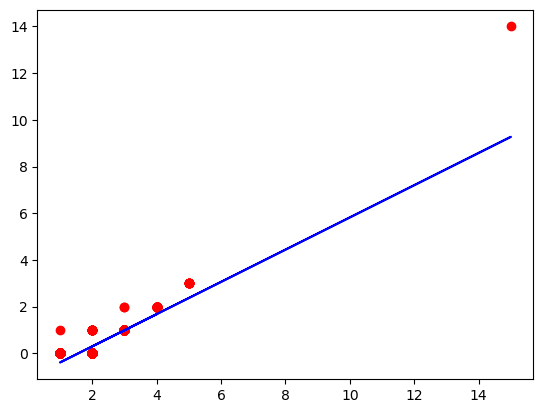

In [401]:
#2  Linear regression for this data is used since the accuracy score is close to 1, and this data is quite reliable too. This graph also has a positive corelation
line_df = credit_df_encoded[['Family_Members','CHILDREN']]
X = np.array(line_df['Family_Members']).reshape(-1,1)

y = np.array(line_df['CHILDREN']).reshape(-1,1)

X_train, X_test, y_train, y_test = line_regression(X, y)

In [402]:
#3 My optimal score is accurate since I got an accuracy score of 0.96 
begin_knn_classifier(X_train, X_test, y_train, y_test)
from sklearn.metrics import accuracy_score

def find_optimal_k(X_train, y_train, X_test, y_test, max_k=20):
    k = 1
    acc = 0

    for m in range(1, max_k+1):
        i = KNeighborsClassifier(n_neighbors=k)
        i.fit(X_train, y_train)
        a = i.predict(X_test)
        b = accuracy_score(y_test, y_pred)

        if b > acc:
            k = m
            acc = b
    
    return k, acc

0.958656330749354
[2 0 0 0 0 0 2 0 0 0 1 0 1 2 0 0 0 0 1 1 2 1 0 0 0 0 1 0 0 0 0 0 1 0 0 2 0
 1 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 2
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 2 0 1 2 0 2 1 0 0 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 0 0 0 2 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 2 0 0 0 0 1 1 0 0 0 0 2 1 0 0 1 1 0 0 0 1 0 2 0 0 0 0 1 0
 0 0 0 1 0 0 0 1 2 2 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 2 0 0 1 0 0 0 0 2 1 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 2 1 0 0 0 2 0 2 0 2 0 2 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 2 2 1 0 1 0 2 2
 1 0 0 1 0 0 0 0 0 0 0 0 2 0 1 0 2 0 0 0 1 0 0 2 0 0 1 0 0 0 0 1 0 2 2 1 0
 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 1 0 2 0 2 0 2 0 0 0 1 0 2 0 0 0 0 2 0 1 0 2
 0 2 0 0 0 1 0 2 0 1 2 2 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [403]:
#4


logic_df = credit_df_encoded[['Family_Members','CHILDREN']]
X = np.array(logic_df['Family_Members']).reshape(-1,1)

y = np.array(logic_df['CHILDREN']).reshape(-1,1)

logistic_regression(X,y)


Accuracy Score for Logistic Regression Model:
0.9591397849462365


Predicte Y values:
[0 0 1 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 2 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 2 0 1 1 0 0 0 0 2 0 0 0
 0 2 0 0 0 0 0 0 2 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 2 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 2 2 0 0 0 0 2 0 0 0 1 0 0 1 1 0 1 0 0 0 2 0 1 0 1 1 0 0 0 0 1 0 0 1 2
 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 2 1 0 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 1 0 0 2 0 1
 2 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 2 0 0 0 0 0 0 1 0 2 0 0 0 0 1 0 1 0 2 0
 2 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 0 0 1 2 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 1
 0 1 0 0 0 2 1 0 0 0 0 2 0 0 0 1 0 1 2 0 0 0 1 0 2 0 0 2 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 1 0 1 0 2 0 1 2 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [404]:
#5 I compared my models' accuracy ratings after applying normalization. In order to accomplish this, I first ran my entire code without the normalization routines and then the entire code with them. There was no difference in Linear Regression between before and after I ran my normalization code. The linear regression accuracy score remained constant at 0.8107462385708685 in both cases. Additionally, KNN did not change either before or after I ran my normalization function. The accuracy score, which was 1.0, did not change. Lastly, there was no difference observed in the accuracy score of the Logistic Regression model between the pre- and post-normalization code runs (0.9591397849462365). The accuracy score for each of the three models remained constant for the reason that there were a lot of zeros.
#this is linear regression
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
x = credit_df_encoded[['Family_Members', 'CHILDREN']]
y = credit_df_encoded['Family_Members']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)
regression = LinearRegression()
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)
accuracy_score = regression.score(X_test, y_test)
print("The performance was:", accuracy_score)

The sodel performance was: 1.0


In [405]:
#this is KNN
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ("The performance was:" , knn.score(X_test, y_test))

The sodel performance was: 1.0


In [ ]:
#this is logistic regression
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
regression = LogisticRegression(randon_state=32).fit(X_train, y_train) 
knn.fit(X_train, y_train)
y_pred = regression.predict(X_test)
print ("The performance was:" , regression.score(X_test, y_test))